In [156]:
import pandas as pd

df = pd.read_csv('LifeExpectancyData.csv')
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [157]:
df = df.groupby('Country').first().reset_index()
df = df[['Schooling', 'Adult Mortality']]
df

Schooling  Adult Mortality
0         10.1            263.0
1         14.2             74.0
2         14.4             19.0
3         11.4            335.0
4         13.9             13.0
..         ...              ...
188       14.3            157.0
189       12.6            127.0
190        9.0            224.0
191       12.5             33.0
192       10.3            336.0

[193 rows x 2 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6412b7cc0>,
      dtype=object)

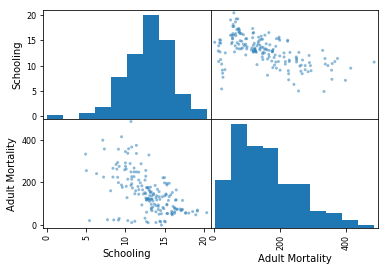

In [158]:
%matplotlib inline

from pandas.plotting import scatter_matrix

scatter_matrix(df)

In [146]:
df = df.dropna()
df.isnull().sum()

Schooling          0
Adult Mortality    0
dtype: int64

In [147]:
X = df[ ['Schooling'] ]
y = df['Adult Mortality']

display(X)
display(y)

Schooling
0         10.1
1         14.2
2         14.4
3         11.4
4         13.9
..         ...
188       14.3
189       12.6
190        9.0
191       12.5
192       10.3

[173 rows x 1 columns]

0      263.0
1       74.0
2       19.0
3      335.0
4       13.0
       ...  
188    157.0
189    127.0
190    224.0
191     33.0
192    336.0
Name: Adult Mortality, Length: 173, dtype: float64

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

display(X_train)
display(X_test)

Schooling
132       13.4
75        19.0
55         5.0
54         9.2
91        10.8
..         ...
111       14.8
73        11.2
127        8.1
53        13.2
192       10.3

[86 rows x 1 columns]

Schooling
60        16.3
162        7.2
69         8.8
61        12.6
136       13.4
..         ...
56        16.5
122        5.4
173       14.3
70         9.2
130       10.0

[87 rows x 1 columns]

In [153]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

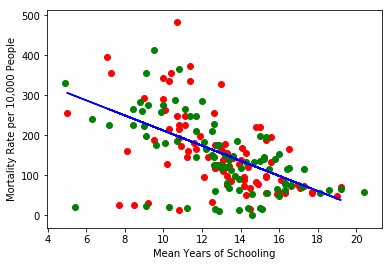

In [154]:
import matplotlib.pyplot as plt

plt.xlabel("Mean Years of Schooling")
plt.ylabel("Mortality Rate per 10,000 People")
plt.plot(X_train, model.predict(X_train), color='blue')
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='green')

plt.show()